In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Plotting matrix from: /content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/BB08RE11-210-PRCMIG.npy
(2326, 23777)


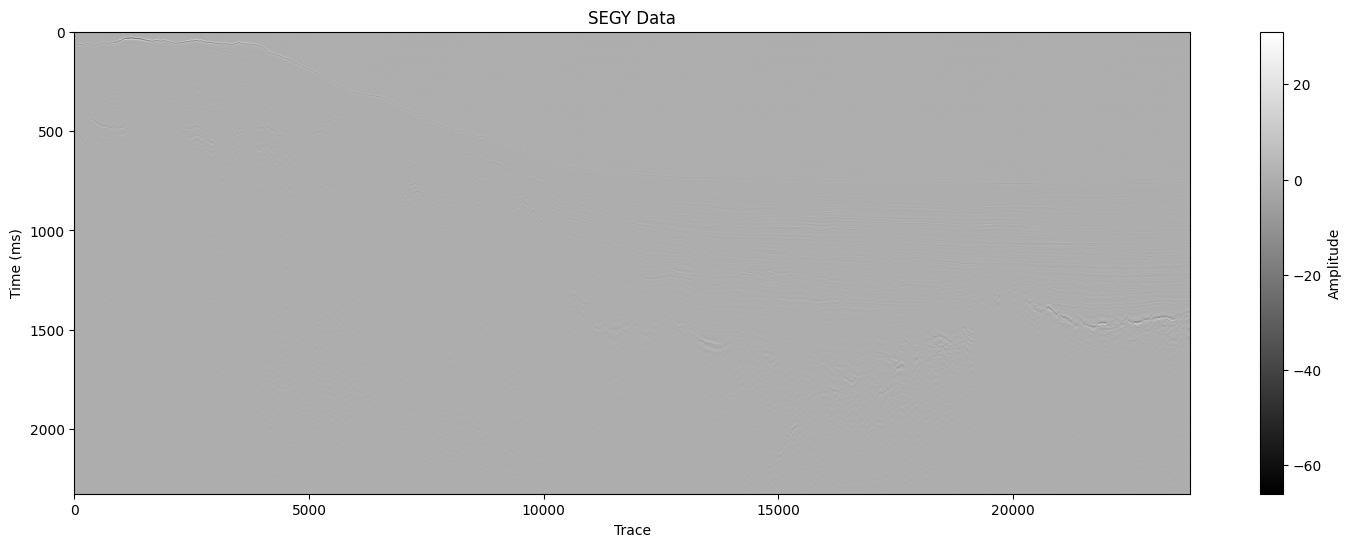

In [3]:
def plot_numpy_matrix(npy_file, time_scale_factor=1):
    """
    Plots the numpy matrix as an image.
    """
    data = np.load(npy_file)
    num_samples, num_traces = data.shape
    print(data.shape)


    # Definindo o fator de escala para o eixo y (tempo)
    time_scale = np.arange(num_samples) * time_scale_factor

    plt.figure(figsize=figsize)
    plt.imshow(data, cmap='gray', aspect='auto', extent=[0, num_traces, time_scale[-1], time_scale[0]])
    plt.colorbar(label='Amplitude')
    plt.xlabel('Trace')
    plt.ylabel('Time (ms)')
    plt.title('SEGY Data')
    plt.show()

def plot_numpy_matrices_in_folder(folder, time_scale_factor=1):
    """
    Plots numpy matrices in the given folder.
    """
    for file in os.listdir(folder):
        if file.endswith('.npy'):
            npy_file = os.path.join(folder, file)
            print("Plotting matrix from:", npy_file)
            plot_numpy_matrix(npy_file, time_scale_factor)

# Substitua 'caminho_da_sua_pasta' pelo caminho da pasta que contém os arquivos numpy
folder_path = '/content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/'
# Fator de escala de tempo duplo (por exemplo, 2 para escala de tempo duplo)
figsize = (18, 6)
time_scale_factor = 1
plot_numpy_matrices_in_folder(folder_path, time_scale_factor)



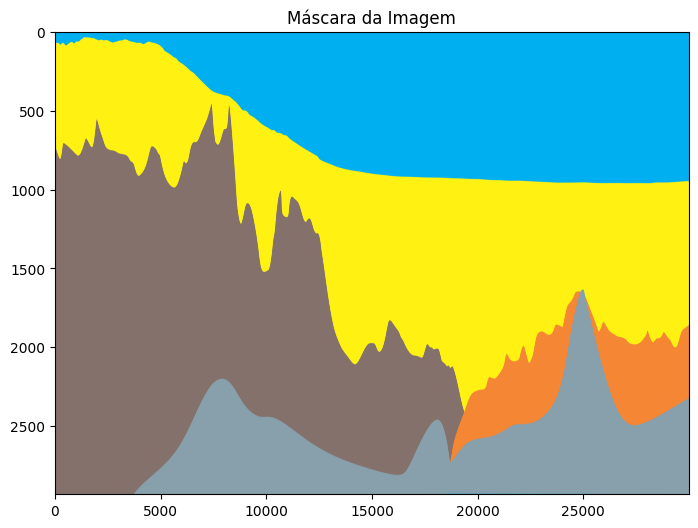

In [4]:
imageMascara = '/content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/mascara_210.png'
# legenda = '/content/drive/MyDrive/newProjetoMeco/legenda.png'

# Ler a imagem com três canais
imgMascara = cv2.imread(imageMascara)
# legenda = cv2.imread(legenda)

# Verificar se as imagens foram carregadas corretamente
if imgMascara is None:
    print("Erro ao carregar uma ou ambas as imagens!")
else:
    # Mostrar as imagens lidas
    plt.figure(figsize=(18, 6))  # Configura o tamanho total da figura
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imgMascara, cv2.COLOR_BGR2RGB), aspect='auto')
    plt.title('Máscara da Imagem')

    # plt.subplot(1, 2, 2)
    # plt.imshow(cv2.cvtColor(legenda, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

    imgMascara = cv2.cvtColor(imgMascara, cv2.COLOR_BGR2GRAY)

In [5]:
print(imgMascara.shape)

(2935, 30000)


In [6]:
from PIL import Image

# Caminhos das imagens
imageMascara = '/content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/mascara_210.png'

original_dim = (23777, 2326)
imgMascara = cv2.imread(imageMascara)
imgMascara = cv2.cvtColor(imgMascara, cv2.COLOR_BGR2RGB)

resized_mask = cv2.resize(imgMascara, original_dim, interpolation=cv2.INTER_NEAREST)

# Verificar o resultado
print("Dimensão original da máscara:", imgMascara.shape)
print("Nova dimensão da máscara:", resized_mask.shape)

Dimensão original da máscara: (2935, 30000, 3)
Nova dimensão da máscara: (2326, 23777, 3)


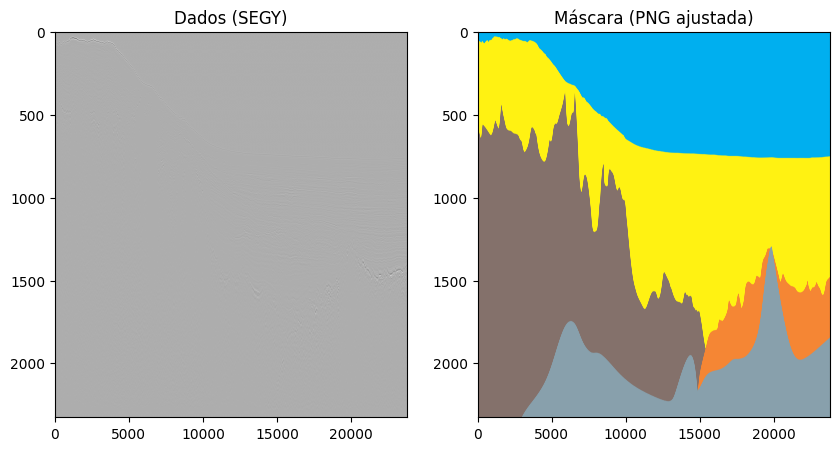

In [7]:
import matplotlib.pyplot as plt

data = np.load('/content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/BB08RE11-210-PRCMIG.npy')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(data, cmap='gray', aspect='auto')
plt.title('Dados (SEGY)')

plt.subplot(1, 2, 2)
plt.imshow(resized_mask, cmap='gray', aspect='auto')
plt.title('Máscara (PNG ajustada)')

plt.show()

## Começar a dividir os patches com seus labels

In [8]:
color_to_class = {
    (0, 175, 239): 'agua',  # Azul
    (255, 242, 18): 'bacia sedimentar',  # Amarelo
    (132, 113, 107): 'crosta continental',  # Marrom
    (245, 134, 52): 'crosta oceanica',  # Laranja
    (136, 160, 172): 'manto'  # Cinza
}

In [9]:
import numpy as np

# Parâmetros dos patches
patch_size = (64, 64)  # Define o tamanho de cada patch
height, width, _ = resized_mask.shape

# Função para encontrar a classe predominante em um patch
def get_dominant_class(patch, color_to_class):
    # Reformatar o patch para (N, 3) para facilitar a contagem de cores
    reshaped_patch = patch.reshape(-1, 3)
    unique_colors, counts = np.unique(reshaped_patch, axis=0, return_counts=True)

    # Encontrar a cor predominante
    dominant_color = unique_colors[np.argmax(counts)]

    # Mapear para a classe correspondente
    return color_to_class.get(tuple(dominant_color), 'unknown')  # Retorna 'unknown' se a cor não estiver mapeada

# Dividir a máscara em patches e rotular
patch_labels = []
for i in range(0, height, patch_size[0]):
    for j in range(0, width, patch_size[1]):
        # Extrair o patch
        patch = resized_mask[i:i+patch_size[0], j:j+patch_size[1], :]

        # Determinar a classe predominante
        label = get_dominant_class(patch, color_to_class)
        patch_labels.append(label)

# Verificar os rótulos obtidos
print("Total de patches:", len(patch_labels))
print("Classes encontradas:", set(patch_labels))

Total de patches: 13764
Classes encontradas: {'manto', 'crosta oceanica', 'agua', 'crosta continental', 'bacia sedimentar'}


## fazer o mesmo passo para a imagem original

In [ ]:
# Caminho do arquivo .npy
image_npy_path = '/content/drive/MyDrive/newProjetoMeco/BB08RE11-210-PRCMIG/BB08RE11-210-PRCMIG.npy'

# Carregar a imagem .npy
image_data = np.load(image_npy_path)

# Garantir que a imagem e a máscara têm dimensões compatíveis
height, width = image_data.shape[:2]
patch_size = (64, 64)

# Ajustar para múltiplos de 128 (se necessário)
new_height = (height // patch_size[0]) * patch_size[0]
new_width = (width // patch_size[1]) * patch_size[1]

# Recortar imagem e máscara para tamanhos ajustados
adjusted_image = image_data[:new_height, :new_width]
adjusted_mask = resized_mask[:new_height, :new_width]

# Dividir a imagem e a máscara em patches
image_patches = []
mask_patches = []

for i in range(0, new_height, patch_size[0]):
    for j in range(0, new_width, patch_size[1]):
        # Extrair patches da imagem e da máscara
        image_patch = adjusted_image[i:i+patch_size[0], j:j+patch_size[1]]
        mask_patch = adjusted_mask[i:i+patch_size[0], j:j+patch_size[1], :]

        # Adicionar aos arrays
        image_patches.append(image_patch)
        mask_patches.append(mask_patch)

# Garantir que os números de patches são iguais
assert len(image_patches) == len(mask_patches), "Número de patches da imagem e máscara não corresponde!"

# Determinar os rótulos com base na máscara
patch_labels = [get_dominant_class(patch, color_to_class) for patch in mask_patches]

# Verificar se tudo está correto
print("Total de patches (imagem):", len(image_patches))
print("Total de patches (máscara):", len(mask_patches))
print("Classes encontradas:", set(patch_labels))


Total de patches (imagem): 13356
Total de patches (máscara): 13356
Classes encontradas: {'crosta oceanica', 'crosta continental', 'bacia sedimentar', 'manto', 'agua'}


## verificando se deu tudo certo graficamente

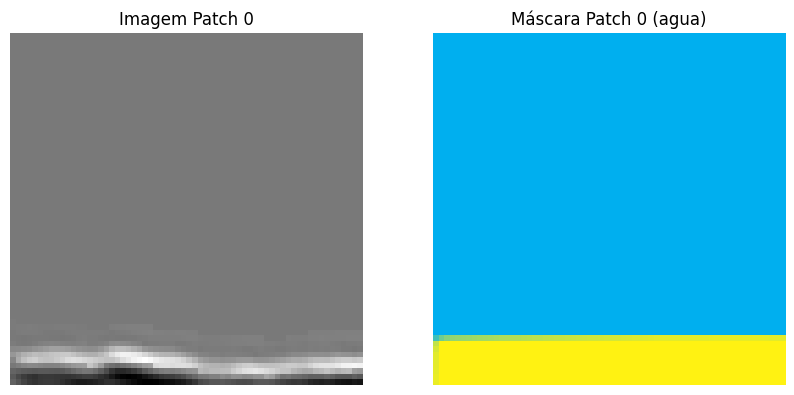

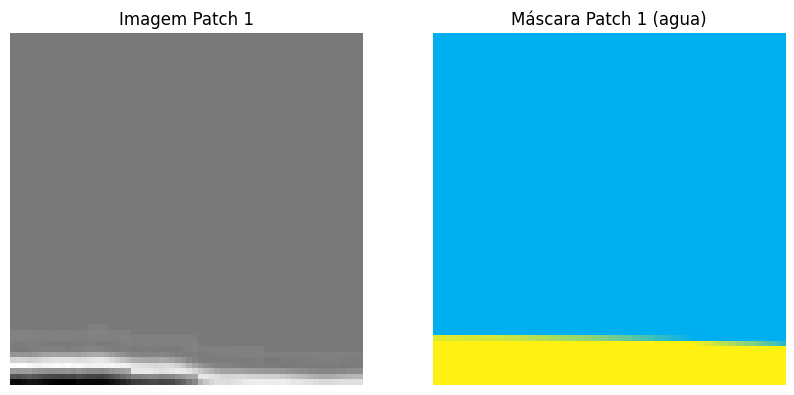

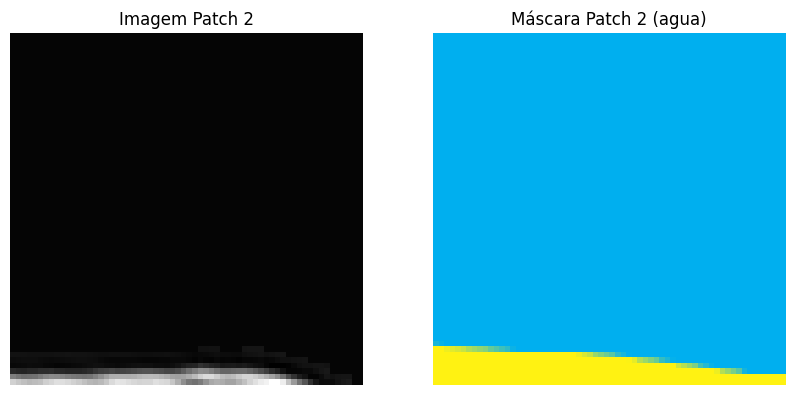

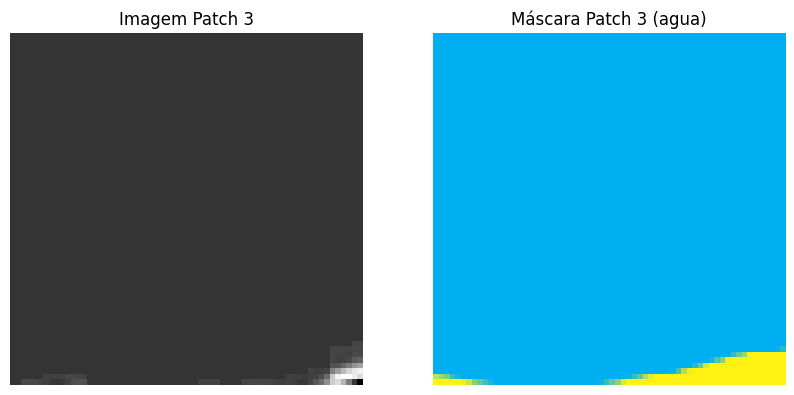

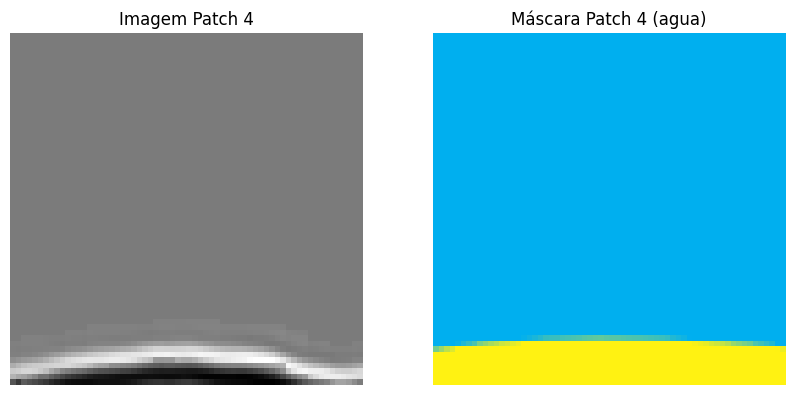

In [ ]:
import matplotlib.pyplot as plt

# Função para exibir um patch da imagem e da máscara com seu rótulo
def display_patch(image_patch, mask_patch, label, patch_idx):
    plt.figure(figsize=(10, 5))

    # Patch da imagem
    plt.subplot(1, 2, 1)
    plt.imshow(image_patch, cmap='gray')  # Ajuste o cmap se necessário
    plt.title(f"Imagem Patch {patch_idx}")
    plt.axis('off')

    # Patch da máscara
    plt.subplot(1, 2, 2)
    plt.imshow(mask_patch)
    plt.title(f"Máscara Patch {patch_idx} ({label})")
    plt.axis('off')

    plt.show()

# Testar visualizando alguns patches
for idx in range(5):  # Altere o número de patches a exibir
    display_patch(image_patches[idx], mask_patches[idx], patch_labels[idx], idx)

In [ ]:
from collections import Counter

# Contar a frequência de cada classe
class_counts = Counter(patch_labels)

# Exibir a contagem das classes
for class_name, count in class_counts.items():
    print(f"Classe '{class_name}': {count} patches")

Classe 'agua': 3107 patches
Classe 'bacia sedimentar': 3929 patches
Classe 'crosta continental': 4036 patches
Classe 'crosta oceanica': 629 patches
Classe 'manto': 1655 patches


In [ ]:
# Data augmentation
from collections import Counter
from albumentations import Compose, HorizontalFlip, VerticalFlip, Rotate
from albumentations.core.composition import OneOf
import random

# Data augmentation
augmentation = Compose([
    OneOf([
        HorizontalFlip(p=0.5), # tirar
        VerticalFlip(p=0.5), # tirar
    ], p=0.5),
    Rotate(limit=45, p=0.5),
])

# Balancear classes
balanced_patches = []
balanced_labels = []

# Quantidade alvo de patches por classe
target_patches = 4000  # Número máximo de patches desejado por classe

# Iterar por cada classe e balancear
for class_name in class_counts:
    class_indices = [idx for idx, label in enumerate(patch_labels) if label == class_name]
    current_patches = [image_patches[idx] for idx in class_indices]

    # Adicionar patches existentes
    balanced_patches.extend(current_patches)
    balanced_labels.extend([class_name] * len(current_patches))

    # Gerar patches adicionais para balancear, se necessário
    while len(current_patches) < target_patches:
        for patch in current_patches:
            augmented = augmentation(image=patch)['image']
            balanced_patches.append(augmented)
            balanced_labels.append(class_name)
            current_patches.append(augmented)  # Adicionar o patch aumentado para continuar gerando até atingir a quantidade desejada
            if len(current_patches) >= target_patches:
                break

# Verificar a nova contagem de classes
new_class_counts = Counter(balanced_labels)
print("\nContagem balanceada de classes:")
for class_name, count in new_class_counts.items():
    print(f"Classe '{class_name}': {count} patches")


Contagem balanceada de classes:
Classe 'agua': 4000 patches
Classe 'bacia sedimentar': 4000 patches
Classe 'crosta continental': 4036 patches
Classe 'crosta oceanica': 4000 patches
Classe 'manto': 4000 patches


## iniciar o treinamento

In [ ]:
color_to_class.values()

dict_values(['agua', 'bacia sedimentar', 'crosta continental', 'crosta oceanica', 'manto'])

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Convertendo os novos patches e rótulos balanceados para arrays numpy
X_balanced = np.array(balanced_patches)  # Novos patches balanceados
y_balanced = np.array([list(color_to_class.values()).index(label) for label in balanced_labels])  # Classes como índices

# Separar treino, validação e teste (70% treino, 15% validação, 15% teste)
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 14025
Tamanho do conjunto de validação: 3005
Tamanho do conjunto de teste: 3006


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # Camadas convolucionais
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    # Flatten e camadas densas
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(color_to_class), activation='softmax')  # Número de classes na saída
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,021 (4.36 MB)

 Trainable params: 1,142,021 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

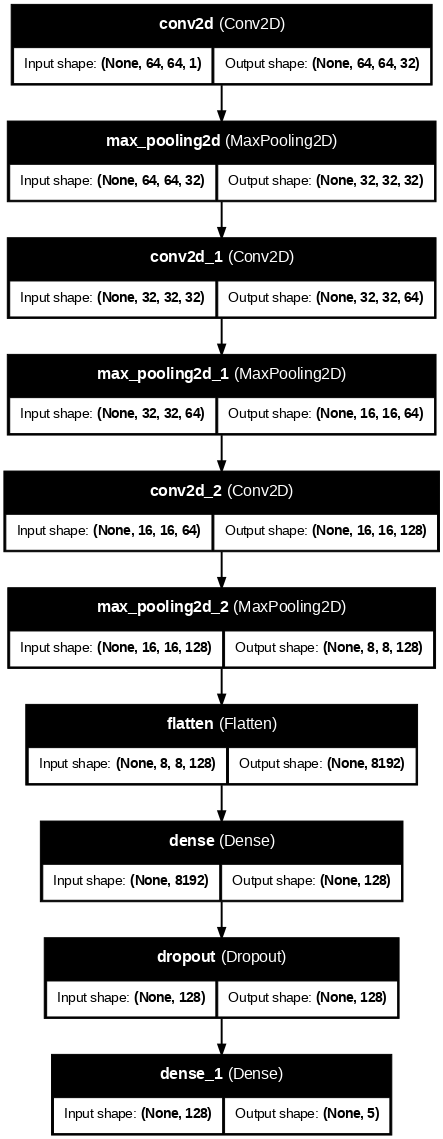

In [ ]:
from tensorflow.keras.utils import plot_model

# Gerar e salvar a imagem do modelo com menor resolução (dpi)
plot_model(model, to_file='model_architecture_small.png', show_shapes=True, show_layer_names=True, dpi=70)


In [ ]:
# Ajustar as dimensões para o canal de entrada (grayscale)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Treinar o modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

# Salvar o modelo treinado
model.save('modelo_treinado2.h5')

Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6063 - loss: 0.9625 - val_accuracy: 0.7161 - val_loss: 0.6445
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7167 - loss: 0.6366 - val_accuracy: 0.7341 - val_loss: 0.5942
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7418 - loss: 0.5828 - val_accuracy: 0.7388 - val_loss: 0.5783
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7586 - loss: 0.5302 - val_accuracy: 0.7547 - val_loss: 0.5366
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7953 - loss: 0.4578 - val_accuracy: 0.7774 - val_loss: 0.4895
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8197 - loss: 0.3986 - val_accuracy: 0.7937 - val_loss: 0.4645
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8484 - loss: 0.3415 - val_accuracy: 0.7950 - val_loss: 0.4705
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8708 - loss: 0.2967 - val_accuracy:

In [ ]:
# Avaliar no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Perda no teste: {test_loss:.4f}")
print(f"Acurácia no teste: {test_accuracy:.4f}")

94/94 - 1s - 10ms/step - accuracy: 0.8377 - loss: 0.7085
Perda no teste: 0.7085
Acurácia no teste: 0.8377


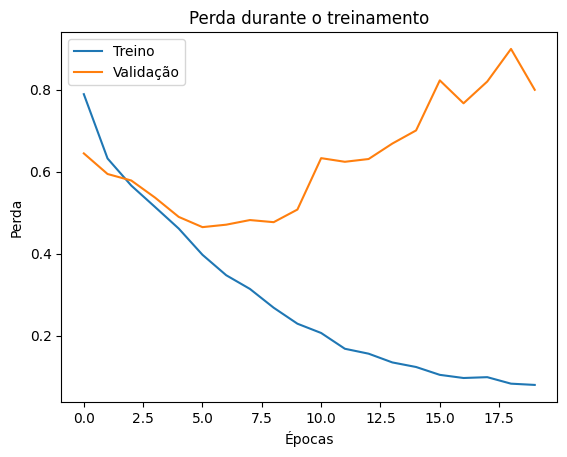

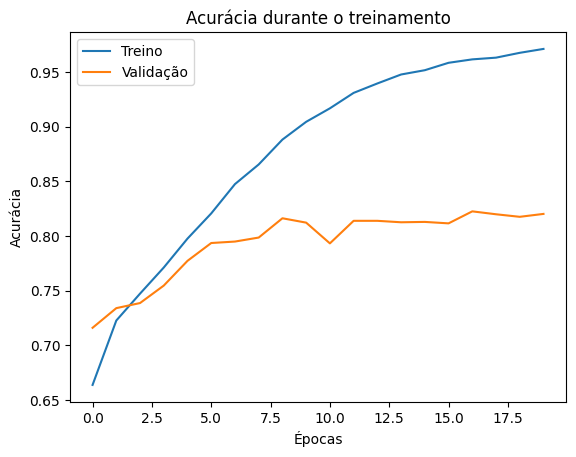

In [ ]:
import matplotlib.pyplot as plt

# Perda
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

# Acurácia
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
                    precision    recall  f1-score   support

              agua       1.00      0.99      1.00       600
  bacia sedimentar       0.89      0.90      0.90       600
crosta continental       0.68      0.71      0.70       606
   crosta oceanica       0.83      0.91      0.87       600
             manto       0.79      0.67      0.72       600

          accuracy                           0.84      3006
         macro avg       0.84      0.84      0.84      3006
      weighted avg       0.84      0.84      0.84      3006



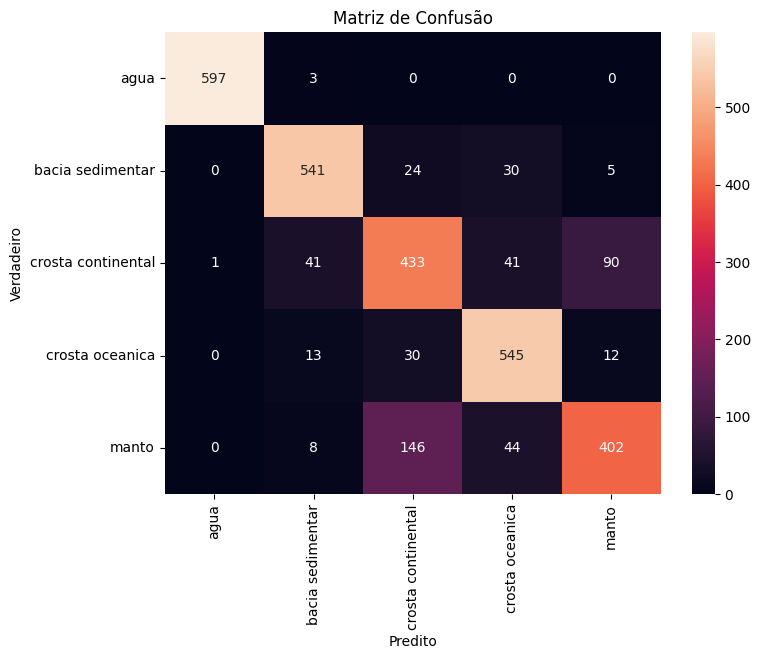

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predições no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)

# Relatório de classificação
print(classification_report(y_test, y_pred, target_names=color_to_class.values()))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=color_to_class.values(), yticklabels=color_to_class.values())
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

## Exemplificação

In [ ]:
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step


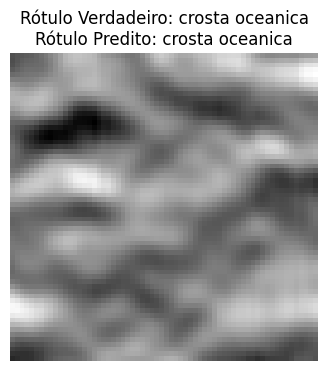

In [ ]:
# Atualize o mapeamento para refletir corretamente a correspondência entre o índice e a classe
index_to_class = {0: 'agua', 1: 'bacia sedimentar', 2: 'crosta continental', 3: 'crosta oceanica', 4: 'manto'}

# Seleção de um exemplo aleatório do conjunto de teste
index = random.randint(0, len(X_test) - 1)
patch = X_test[index]  # O patch da imagem
true_label = y_test[index]  # O rótulo verdadeiro
predicted_label = np.argmax(model.predict(patch[np.newaxis, ...]), axis=1)[0]  # O rótulo predito

# Obter nomes das classes
true_label_name = index_to_class.get(true_label, f"Classe desconhecida ({true_label})")
predicted_label_name = index_to_class.get(predicted_label, f"Classe desconhecida ({predicted_label})")

# Visualizar o patch e os rótulos
plt.figure(figsize=(4, 4))
plt.imshow(patch.squeeze(), cmap='gray')  # Mostrar o patch
plt.title(f"Rótulo Verdadeiro: {true_label_name}\nRótulo Predito: {predicted_label_name}")
plt.axis('off')
plt.show()

## Segmentando a imagem